<div style="text-align: center;">
    <h1>Seminario Final de Estadística</h1>
</div>


## Integrantes

- Jabel Resendiz Aguirre              - C312
- Arianne Camila Palancar Ochando     - C311
- Noel Pérez Calvo                    - C311

## Introducción

La Fórmula 1 (F1) es la categoría más alta del automovilismo deportivo, donde los mejores pilotos y equipos compiten en carreras de alta velocidad alrededor del mundo. Cada temporada, los equipos participan en una serie de carreras conocidas como Grandes Premios, que se llevan a cabo en circuitos de carreras en diferentes países.

El objetivo de este proyecto es analizar y modelar diversos aspectos de las carreras de Fórmula 1 utilizando un conjunto de datos simulado. Este dataset incluye información detallada sobre los conductores, equipos, circuitos, tiempos de reacción, tiempos de pit stop, posiciones finales, velocidades máximas, y número de adelantamientos, entre otros.

### Objetivos : 
1. `Análisis Descriptivo`: Realizar un análisis descriptivo de las variables para entender la distribución y características de los datos.

2. `Pruebas de Hipótesis`: Realizar pruebas de hipótesis para evaluar suposiciones sobre los datos, como la distribución del tiempo de reacción y el número de adelantamientos.

3. `Visualización de Datos`: Crear visualizaciones que ayuden a comunicar los hallazgos de manera efectiva, como gráficos de barras, histogramas y diagramas de dispersión.

El dataset contiene las siguientes variables:

- `Fecha de la carrera`: La fecha en que se llevó a cabo la carrera.
- `Conductor`: El nombre del conductor que participó en la carrera.
- `Edad del conductor`: La edad del conductor en el momento de la carrera.
- `Equipo`: El equipo al que pertenece el conductor.
- `Circuito`: El nombre del circuito donde se realizó la carrera.
- `Tiempo de pit stop`: El tiempo que el conductor pasó en los pits, medido en segundos.
- `Tiempo de reacción`: El tiempo de reacción del conductor al inicio de la carrera, medido en segundos.
- `Posición final`: La posición en la que el conductor terminó la carrera.
- `DNF (Did Not Finish)`: Indicador de si el conductor terminó la carrera (0) o no (1).
- `Puntos`: Los puntos obtenidos por el conductor en la carrera, basados en su posición final.
- `Velocidad máxima`: La velocidad máxima alcanzada por el conductor durante la carrera, medida en km/h.
- `Número de adelantamientos`: El número de adelantamientos realizados por el conductor durante la carrera.

Se espera que este análisis proporcione una comprensión más profunda de los factores que influyen en el rendimiento de los conductores en las carreras de Fórmula 1.



## Importando módulos

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import norm 
from scipy.stats import chi2
import matplotlib.pyplot as plt
import seaborn as sns

## Cargando datos

In [2]:
f1 = pd.read_csv('formula1_race_data.csv')

## Análisis exploratorio de los datos

### Descripción básica de los datos

In [3]:
f1.head() # verficar que se han cargado correctamente los datos

,Date,Driver,Age,Team,Circuit,PitStopTime,ReactionTime,FinalPosition,DNF,Points,MaxSpeed,Overtakes
0,2016-09-10,Perez,35,Williams,Melbourne,2.651,0.054,9,0,17,330.6,10
1,2023-02-16,Alonso,26,Alpine,Silverstone,2.550,0.470,6,0,20,314.4,10
2,2010-01-12,Ricciardo,31,Williams,Melbourne,3.187,0.186,12,0,0,330.4,5
3,2022-12-05,Ricciardo,26,Williams,Spa,3.358,0.531,12,0,0,303.2,2
4,2018-07-18,Bottas,26,Ferrari,Montreal,3.180,0.005,6,0,20,330.9,8


In [4]:
f1.info() #Se proporciona información útil sobre el DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           500 non-null    object 
 1   Driver         500 non-null    object 
 2   Age            500 non-null    int64  
 3   Team           500 non-null    object 
 4   Circuit        500 non-null    object 
 5   PitStopTime    500 non-null    float64
 6   ReactionTime   500 non-null    float64
 7   FinalPosition  500 non-null    int64  
 8   DNF            500 non-null    int64  
 9   Points         500 non-null    int64  
 10  MaxSpeed       500 non-null    float64
 11  Overtakes      500 non-null    int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 47.0+ KB


In [5]:
f1.describe() #generar estadísticas descriptiva del DataFrame

,Age,PitStopTime,ReactionTime,FinalPosition,DNF,Points,MaxSpeed,Overtakes
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.00000,500.000000,500.000000
mean,27.640000,2.995430,0.198526,10.452000,0.16200,8.86200,329.979800,5.290000
std,5.081934,0.489169,0.192289,5.737031,0.36882,10.37585,9.875064,2.394445
min,12.000000,1.529000,0.000000,1.000000,0.00000,0.00000,299.100000,0.000000
25%,24.000000,2.646750,0.065000,6.000000,0.00000,0.00000,323.300000,4.000000
50%,28.000000,3.001000,0.139000,10.000000,0.00000,0.00000,329.400000,5.000000
75%,31.000000,3.330000,0.275500,16.000000,0.00000,20.00000,336.825000,7.000000
max,43.000000,4.385000,1.917000,20.000000,1.00000,25.00000,355.300000,14.000000


<h3 style="text-align: center;">DNF (Did Not Finish)</h3>

**“Did Not Finish” (DNF)** es un término utilizado para indicar que un competidor no completó la carrera. Esto puede ocurrir por diversas razones, como fallos mecánicos, accidentes, problemas de salud, o cualquier otra circunstancia que impida al competidor llegar a la meta. Hagamos un análisis de la distribuciones de la variable DNF:

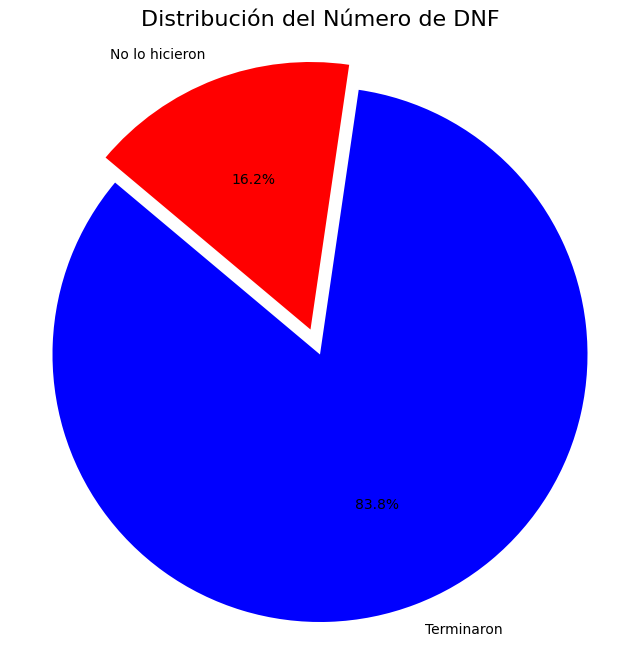

In [8]:
#Contarla cantidad de veces que se terminó una carrera
f1_counts = f1["DNF"].value_counts()
f1_counts


# Definir etiquetas y colores
labels = ['Terminaron', 'No lo hicieron']
colors = ['blue', 'red']  # Colores personalizados (opcional)

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))  # Tamaño opcional para una mejor visualización
plt.pie(
    f1_counts,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',  # Muestra el porcentaje en cada segmento
    startangle=140,      # Gira el inicio del gráfico para una mejor estética
    explode=(0.05, 0.05) # Resalta ligeramente cada segmento
)

plt.title('Distribución del Número de DNF', fontsize=16)
plt.axis('equal')  # Asegura que el gráfico sea circular
plt.show()


Consideremos una variable de Bernoulli que nos manifiesta si un corredor finaliza la carrera, con lo cual tendremos una proporción muestral.

In [33]:
#tamano de la muestra
total_muestra = f1_counts.sum()

#estimador de la probabilidad de la distribucion de Bernoulli que nos dice si un corredor finalizo la carrera (DNF=0)
p_estimator = f1_counts[0]/ total_muestra
p_estimator

#estimador para la varianza de la  misma variable (DNF=0) con distribucion de Bernoulli
variance_dnf = p_estimator*(1-p_estimator)/total_muestra
variance_dnf

0.000271512

Construyamos un intervalo de confianza del 95 % para la proporción antes calculada.

Recordemos que el intervalo de confianza para una proporción se calcula
$$P(A) \in [ \overline{\rho} - \sqrt{\frac{\overline{\rho}(1 - \overline{\rho})}{n}}Z_{1 - \frac{\alpha}{2}} ; \overline{\rho} + \sqrt{\frac{\overline{\rho}(1 - \overline{\rho})}{n}}Z_{1 - \frac{\alpha}{2}}]$$

In [34]:
alpha = 0.05                                # nivel de significancia
Z = norm.ppf( 1-alpha/2 )                   # valor del estadígrafo
sq = np.sqrt(variance_dnf)            # auxiliar cálculo
lower_bound = p_estimator - sq*Z            # límite inferios
upper_bound = p_estimator + sq*Z            # límite superior

print("Intervalo de confianza : [ ",lower_bound,"," , upper_bound, "]")


Intervalo de confianza : [  0.8057044559215314 , 0.8702955440784685 ]


<h4 style="text-align: center;">¿ Qué tan lejos está de la realidad ?</h3>


En general, la tasa de finalización de carreras ha mejorado significativamente a lo largo de los años debido a los avances en la tecnología y la fiabilidad de los monoplazas.

[Por ejemplo, en la temporada 2021, la tasa de finalización de carreras fue bastante alta, con un promedio de alrededor del 85-90% de los coches que comenzaron una carrera logrando terminarla](https://www.tudn.com/formula-1). Veamos si nuestro valor de proporción se puede considerar menor al dado.

$$H_0: \rho \geq 0.85$$

$$H_1: \rho < 0.85$$

Estadígrafo: $$\overline{Z} = \frac{\overline{\rho} - \rho_0}{\sqrt{\rho_0(1 - \rho_0)}} \sqrt{n}$$

Región crítica (n > 30): $$\overline{Z} < -Z_{1-\alpha}$$

In [35]:
# datos 

alpha = 0.05                                        # Nivel de significancia
p0= 0.85                                            # Proporción bajo la hipótesis nula
Z = norm.ppf( 1-alpha )                             # valor critico 
Z_hat = (p_estimator - p0)*np.sqrt(total_muestra/(p0*(1-p0)))   # calcular el estadigrafo

print(f"Valor Z_hat: {Z_hat}")

# analizar con el valor critico

if Z_hat < -Z:
    print("Rechazamos la hipótesis nula. La proporción muestral es significativamente menor que la proporción poblacional.")

else:
     print("No rechazamos la hipótesis nula. No hay evidencia suficiente para afirmar que la proporción muestral es menor que la proporción poblacional.")

Valor Z_hat: -0.7514691493021801
No rechazamos la hipótesis nula. No hay evidencia suficiente para afirmar que la proporción muestral es menor que la proporción poblacional.


No hay suficiente evidencia para concluir que la proporción de finalización de carreras es significativamente menor que 85%.

<h3 style="text-align: center;"> PITS STOPS</h3>

Los ***pit stops o paradas en boxes***  son momentos cruciales en las carreras de automovilismo donde los vehículos se detienen en un área designada del circuito para realizar diversas tareas. Estas tareas pueden incluir el cambio de neumáticos, repostar combustible, hacer ajustes mecánicos o aerodinámicos, y en algunas competiciones, cambiar de piloto. 

Se hace entonces un análisis de los tiempos de pit stops. Visualicemos los datos.

Text(0.5, 0, 'Tiempo (segundos)')

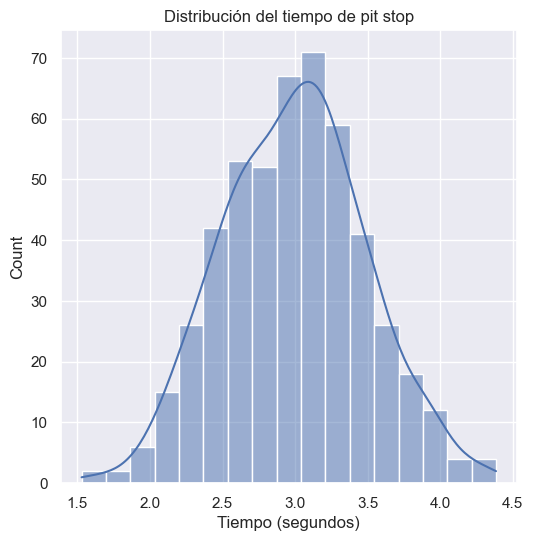

In [36]:
# dimensiones de la figura

plt.figure(figsize=(20, 20))               
sns.set()
plt.subplot(3, 3, 3)

#creacion del histograma del DataFrame
sns.histplot(f1['PitStopTime'], kde=True)
plt.title('Distribución del tiempo de pit stop')
plt.xlabel('Tiempo (segundos)')


El histograma parece mostrar que los tiempos de pits stops distribuyen normal. Hagamos pruebas de normalidad para comprobar si distribuye normal mediante la prueba de Shapiro-Wilk , de D'Agostino-Pearson implementada en la función ***normaltest*** de la biblioteca ***scipy de Python*** 


In [37]:
# Realiza la prueba de normalidad con normaltest
stat, p_value = st.normaltest(f1["PitStopTime"])

print(f"Stat = {stat}, p_value = {p_value}")

if p_value > 0.05:
    print("El tiempo de los pits stops parece estar normalmente distribuidos (no se rechaza H0)")

else:
    print("El tiempo de los pits stops no parece estar normalmente distribuidos (se rechaza H0)\n")

# Realiza la prueba de Shapiro-Wilk
print("Ahora con la prueba de Shapiro-Wilk")
stat, p_value = st.shapiro(f1["PitStopTime"])
print(f" Stat = {stat}, p_value = {p_value}")
if p_value > 0.05:
    print("El tiempo de los pits stops parece estar normalmente distribuidos (no se rechaza H0)")

else:
    print("El tiempo de los pits stops no parece estar normalmente distribuidos (se rechaza H0)\n")



Stat = 0.7469599845099204, p_value = 0.6883347581849137
El tiempo de los pits stops parece estar normalmente distribuidos (no se rechaza H0)
Ahora con la prueba de Shapiro-Wilk
 Stat = 0.9981753445629504, p_value = 0.8796591541099301
El tiempo de los pits stops parece estar normalmente distribuidos (no se rechaza H0)


Para evaluar la normalidad de los tiempos de duración de los pit stops en nuestra muestra, utilizamos un ***gráfico Q-Q***. Este gráfico nos permite comparar visualmente los cuantiles de los datos observados con los cuantiles de una distribución normal teórica. Si los puntos en el gráfico se alinean a lo largo de una línea recta, podemos concluir que los tiempos de pit stops siguen una distribución normal. Sin embargo, si observamos desviaciones significativas de la línea recta, esto indicará que los tiempos no siguen una distribución normal.

El gráfico Q-Q es una herramienta poderosa para diagnosticar la normalidad de los datos y nos ayudará a entender mejor el comportamiento de los tiempos de pit stops en diferentes carreras.


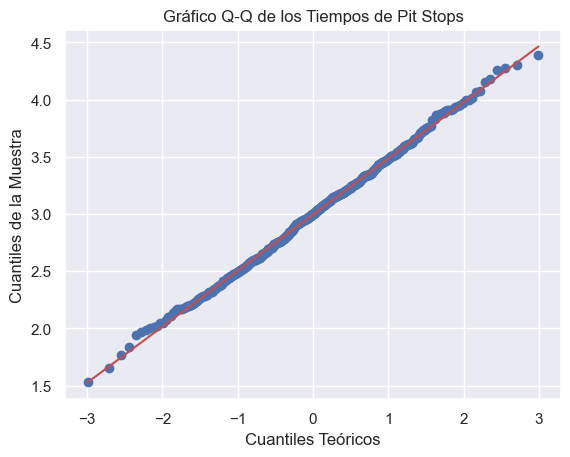

In [38]:
# Genera el gráfico Q-Q
st.probplot(f1["PitStopTime"], dist="norm", plot=plt)
plt.title('Gráfico Q-Q de los Tiempos de Pit Stops')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de la Muestra')
plt.grid(True)
plt.show()

No hay problema para suponer entonces que el tiempo que un auto de carrera permanece en los pits stops distribuye normal, lo cual es lógico tratándose de que :
1. `Estandarización de procedimientos`:Los equipos de mecánicos siguen procedimientos estandarizados y bien entrenados para realizar las tareas durante un pit stop (cambio de neumáticos, repostaje, ajustes mecánicos). Esta estandarización reduce la variabilidad extrema y centra los tiempos alrededor de un promedio.

2. `Entrenamiento y práctica`: Los equipos de mecánicos practican constantemente para mejorar su eficiencia y reducir errores. Este entrenamiento continuo ayuda a que los tiempos de pit stop se distribuyan de manera más uniforme alrededor de un valor medio.

3. `Condiciones controladas`: Las condiciones en los boxes están diseñadas para ser lo más controladas posible, minimizando factores externos que puedan causar grandes desviaciones en los tiempos de pit stop.

Haciendo uso del estimador insesgado de la media:     $\overline{x} = \frac{1}{n}\sum{x_i}$

In [39]:
# estimador puntual para la media

media_pits = np.mean(f1["PitStopTime"])
media_pits

2.99543

Y el estimador insesgado de la varianza $S^2 = \frac{1}{n-1}\sum{(x_i - \overline{x})^2}$

In [40]:
# estimador puntual para la varianza

var_est_pits = np.var(f1["PitStopTime"], ddof=1)
var_est_pits

0.23928618547094188

Con los estimadores puntuales de la media y la varianza calculados, podemos también estimar la media poblacional por intervalo de confianza. Para ello utilicemos un nivel de confianza del 90%. El intervalo de confianza para la media en una distribución normal con varianza desconocida es: 

$$\mu \in [\overline{x} - Z_{1-\frac{\alpha}{2}}*\frac{S}{\sqrt{n}}, 
           \overline{x} + Z_{1-\frac{\alpha}{2}}*\frac{S}{\sqrt{n}}
]$$

In [41]:
alpha = 0.10                                   # nivel de significancia
Z = norm.ppf(1 - alpha/2)                      # valor critico
e = (np.sqrt(var_est_pits/total_muestra)) * Z  # calculo del error

lower_bound = media_pits - e                   # limite inferior
upper_bound = media_pits + e                   # limite superior
print("Intervalo de confianza para la media : [ ",lower_bound,"," , upper_bound, "]")



Intervalo de confianza para la media : [  2.959446693516121 , 3.0314133064838784 ]


Con los estimadores puntuales de la media y la varianza calculados, podemos también estimar la varianza poblacional por intervalo de confianza. Para ello utilicemos una seguridad del 90%. Como sabemos que la edad distribuye normal podemos utilizar el intervalo de confianza siguiente: 

$$\sigma^2 \in [\frac{(n-1)S^2}{\chi^2_{1-\frac{\alpha}{2}}(n-1)},
                \frac{(n-1)S^2}{\chi^2_{\frac{\alpha}{2}}(n-1)}
]$$

In [42]:
# calculo del intervalo de confianza para la media

alpha = 0.10               # nivel de signficancia
df = total_muestra -1      # grados de libertad

#Valores criticos de chi-cuadrado con n-1 grados de libertad
chi2_lower = chi2.ppf (1 - alpha /2 , df) 
chi2_upper = chi2.ppf(alpha/2,df)

# Intervalo de confianza para la varianza

lower_bound = (df * var_est_pits) / chi2_lower
upper_bound = (df * var_est_pits) / chi2_upper


print("Intervalo de confianza para la varianza es : [ ",lower_bound,"," , upper_bound, "]")


Intervalo de confianza para la varianza es : [  0.21628195841589923 , 0.26640812246539336 ]


<h3 style="text-align: center;"> PRUEBA DE HIPÓTESIS DE DOS POBLACIONES</h3>

En el presente estudio, se analiza la relación entre la velocidad máxima promedio de los pilotos de Fórmula 1 mayores de 30 años y aquellos de 30 años o menos. Según investigaciones previas, se ha observado que los pilotos más jóvenes tienden a alcanzar velocidades máximas más altas debido a su agilidad y reflejos rápidos. Sin embargo, otros estudios sugieren que la experiencia de los pilotos mayores de 30 años les permite mantener velocidades competitivas y consistentes. Este análisis tiene como objetivo determinar si existe una diferencia significativa en las velocidades máximas promedio entre estos dos grupos de edad.

In [43]:
# filtrar los datos de velocidad maxima para mayores de 30

filtred_older = f1[f1['Age']>30]["MaxSpeed"]             # velocidades maximas en mayores de 30

filtred_younger =  f1[f1['Age']<=30]["MaxSpeed"]         # velocidades maximas en menores de 31

print("En nuestro estudio hay un total de ", len(filtred_older), "conductores por encima de los 30" )
print("En nuestro estudio hay un total de ", len(filtred_younger), "conductores por debajo de los 31" )

En nuestro estudio hay un total de  151 conductores por encima de los 30
En nuestro estudio hay un total de  349 conductores por debajo de los 31


Comprobemos que se comporten con una distribución normal para realizar pruebas de hipótesis entre estas poblaciones. Empecemos por la prueba en velocidad de corredores mayores de 30. 

Text(0, 0.5, 'Frecuencia')

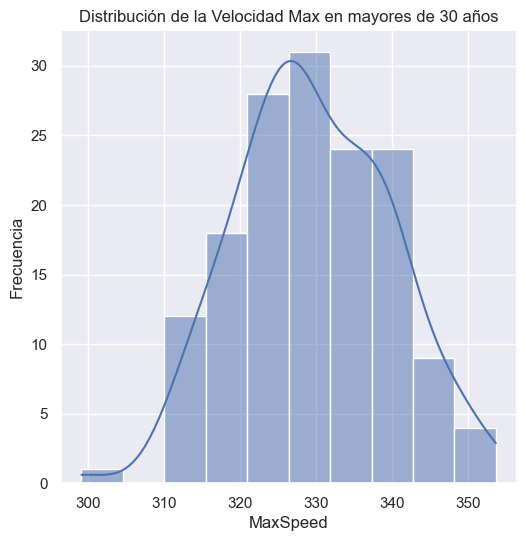

In [44]:
# dimensiones de la figura

plt.figure(figsize=(20, 20))               
sns.set()
plt.subplot(3, 3, 3)

#creacion del histograma del DataFrame
sns.histplot(filtred_older, kde=True)
plt.title('Distribución de la Velocidad Max en mayores de 30 años')
plt.xlabel('MaxSpeed')
plt.ylabel('Frecuencia')


Ahora veamos que nos dice la prueba de normalidad antes vista

In [45]:
#Prueba de Normalidad

stat, p_value = st.normaltest(filtred_older)            

print(f"Stat = {stat}, p_value = {p_value}")

if p_value > 0.05:
    print("La velocidad en mayores de 30 parece estar normalmente distribuidos (no se rechaza H0)")

else:
    print("La velocidad en mayores de 30 no parece estar normalmente distribuidos (se rechaza H0)\n")

Stat = 0.30241458688085254, p_value = 0.8596694763443045
La velocidad en mayores de 30 parece estar normalmente distribuidos (no se rechaza H0)


Finalmente veamos el gráfico Q_Q y culminar el diagnóstico de la distribución que se sigue.


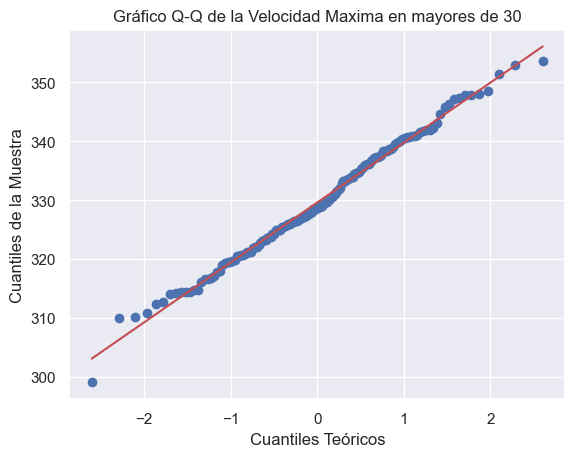

In [46]:
# Genera el gráfico Q-Q
st.probplot(filtred_older, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de la Velocidad Maxima en mayores de 30')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de la Muestra')
plt.grid(True)
plt.show()

Como vemos podemos garantizar que se cumpla la normalidad de la distribución de nuestra muestra de pilotos de mayores de 30 años.

Analicemos entonces la distribución del otro grupo de pilotos que no hemos analizado, los menores de 31 años.

Text(0, 0.5, 'Frecuencia')

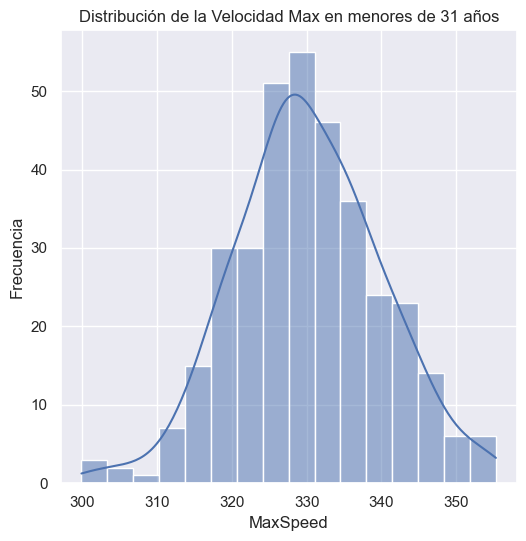

In [47]:
# dimensiones de la figura

plt.figure(figsize=(20, 20))               
sns.set()
plt.subplot(3, 3, 3)

#creacion del histograma del DataFrame
sns.histplot(filtred_younger, kde=True)
plt.title('Distribución de la Velocidad Max en menores de 31 años')
plt.xlabel('MaxSpeed')
plt.ylabel('Frecuencia')

Parece indicar normalidad visualmente, pero apliquemos las conocidas pruebas de normalidad y nuestro gráfico Q_Q

In [48]:
#Prueba de Normalidad

stat, p_value = st.normaltest(filtred_younger)            

print(f"Stat = {stat}, p_value = {p_value}")

if p_value > 0.05:
    print("La velocidad en menores de 31 parece estar normalmente distribuidos (no se rechaza H0)")

else:
    print("La velocidad en menores de 31 no parece estar normalmente distribuidos (se rechaza H0)\n")

Stat = 0.2930066742597245, p_value = 0.8637228499746376
La velocidad en menores de 31 parece estar normalmente distribuidos (no se rechaza H0)


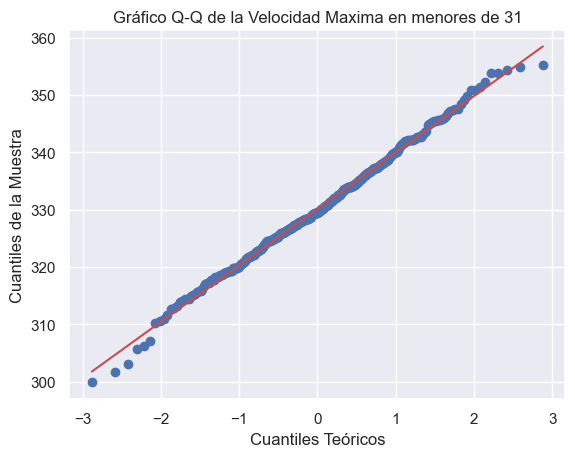

In [49]:
# Genera el gráfico Q-Q
st.probplot(filtred_younger, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de la Velocidad Maxima en menores de 31')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de la Muestra')
plt.grid(True)
plt.show()

Ya hemos demostrado que las velocidades máximas de pilotos mayores de 30 y menores de 31 distribuyen normal, pasemos a analizar la prueba de hipótesis para dos poblaciones: queremos poner como hipótesis que las medias de las velocidades de ambos grupos difieren con un nivel de confianza del 95%.

**Hipótesis planteadas:**

$$H_0: \mu_{old} = \mu_{young}$$  
$$H_1: \mu_{old} \neq \mu_{young}$$  

**Estadígrafo:**  

$$T = \frac{\overline{X}_{old} - \overline{X}_{young}}{\sqrt{\frac{S_{old}^2}{n_{old}} + \frac{S_{young}^2}{n_{young}}}}$$  

**Grados de libertad aproximados:**  
$$
  v = \left( \frac{(\frac{S_{old}^2}{n_{old}} + \frac{S_{young}^2}{n_{young}})^2}{\left(\frac{S_{old}^2}{n_{old}}\right) \left(\frac{1}{n_{old} + 1}\right) + \left(\frac{S_{young}^2}{n_{young}}\right) \left(\frac{1}{n_{young} + 1}\right)} \right) - 2
$$

**Región crítica:**  
$$| T | > t_{1-\frac{\alpha}{2}}(v)$$


In [50]:
# Tamaño de las muestras
n_old = len(filtred_older)
n_young = len(filtred_younger)

# Medias de las muestras
mean_old = np.mean(filtred_older)
mean_young = np.mean(filtred_younger)

# Varianzas de las muestras
var_old = np.var(filtred_older, ddof=1)
var_young = np.var(filtred_younger, ddof=1)

# Estadístico T
T = (mean_old - mean_young) / np.sqrt((var_old / n_old) + (var_young / n_young))

# Grados de libertad aproximados
v = (((var_old**2)/ n_old + (var_young**2)/n_young)**2 )/ ((var_old**2)/ (n_old*(n_old+1)) + (var_young**2)/ (n_young*(n_young+1)))  - 2

# Valor crítico
alpha = 0.05
t_critical = st.t.ppf(1 - alpha/2, df=v)

print('Estadístico t:', T)
print('Grados de libertad aproximados:', v)
print('Valor crítico:', t_critical)

# Región crítica
if abs(T) > t_critical:
    print('Se rechaza H0, por lo que la media de la velocidad maxima en mayores y menores de 30 es diferente')
else:
    print('No rechazamos la hipótesis nula (H0), no es muy diferente la media de la velocidad maxima')


Estadístico t: -0.5139280442160061
Grados de libertad aproximados: 17106.345863822477
Valor crítico: 1.9601026720338697
No rechazamos la hipótesis nula (H0), no es muy diferente la media de la velocidad maxima


### Matriz de Correlación

Analicemos los coeficientes de correlacion entre el conjunto de variables:
 
Rango de valores:
- 1.0: Correlación positiva perfecta. Ambas variables aumentan o disminuyen juntas.
- 0.0: No hay correlación lineal entre las variables.
- -1.0: Correlación negativa perfecta. Una variable aumenta mientras la otra disminuye.

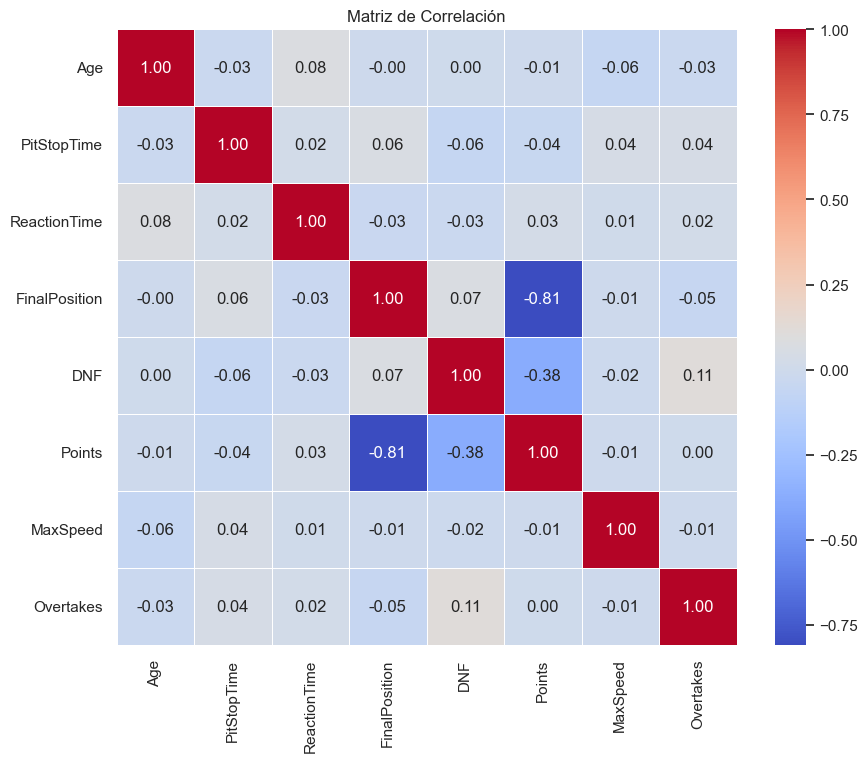

In [51]:
# Filtrar columnas numéricas
numeric_columns = f1.select_dtypes(include=['number'])

# Calcular la matriz de correlación solo con columnas numéricas
correlation_matrix = numeric_columns.corr()

# Crear un mapa de calor para la matriz de correlación
plt.figure(figsize=(10, 8))  # Ajustar el tamaño del gráfico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()



#### Observaciones clave:

1. `FinalPosition y Points` (-0.76):
Existe una fuerte correlación negativa entre la posición final y los puntos obtenidos.
Interpretación: Cuanto mejor sea la posición final (más cerca del primer lugar), más puntos gana el piloto. Esto tiene sentido, ya que en Fórmula 1, los primeros lugares obtienen más puntos.

2. `DNF y Points` (-0.35):
Correlación negativa moderada entre no terminar la carrera y los puntos.
Interpretación: Los pilotos que no terminan una carrera (DNF) suelen obtener pocos o ningún punto, lo que explica esta relación.

3. `PitStopTime y Points` (-0.13):
Correlación negativa débil entre el tiempo en pits y los puntos obtenidos.
Interpretación: Aunque no es una relación fuerte, un tiempo en pits más rápido podría ayudar a los pilotos a obtener mejores posiciones y, por ende, más puntos.

4. `ReactionTime y otras variables` (muy bajas):
No hay correlaciones significativas entre el tiempo de reacción y otras métricas como puntos, posición final, etc.
Interpretación: El tiempo de reacción no parece tener un impacto fuerte en los resultados generales, al menos según estos datos.

5. `MaxSpeed y otras variables`:
Las correlaciones entre la velocidad máxima y las demás variables son muy bajas o cercanas a cero.
Interpretación: La velocidad máxima alcanzada no parece estar directamente relacionada con los resultados finales (puntos o posición) ni con el tiempo en pits.

6. `Overtakes y otras variables`:
Correlaciones débiles con el resto de las variables.
Interpretación: El número de adelantamientos realizados no parece tener una relación directa con el resultado final, lo que podría indicar que otros factores como estrategia o consistencia son más importantes.